<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Copy_of_tf2ss_chapter_6_SAE_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.3 MB/s eta 0:00:00


In [3]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Closed loop TF =  
    s^3 + 7 s^2 - 21 s + 10
-------------------------------
s^6 + s^5 - 6 s^4 - s^2 - s + 6

Poles =  [-3.00000000e+00+0.j  2.00000000e+00+0.j -1.00000000e+00+0.j
  4.70110062e-16+1.j  4.70110062e-16-1.j  1.00000000e+00+0.j]
Zeros =  [-9.35820628+0.j  1.74629215+0.j  0.61191413+0.j]
roots of even polynomial:  [-1.00000000e+00+0.j  8.32667268e-17+1.j  8.32667268e-17-1.j
  1.00000000e+00+0.j]


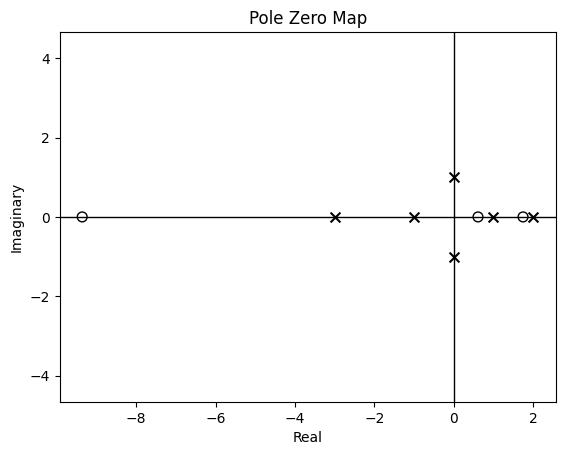

In [5]:
# Define your transfer function:
#TF(s) = (S^3+7s^2-21s+10) / (s^6+s^5-6s^4+0s^3-s^2-s+6)

# Coefficients of the numerator
num = [1,7,-21,10]
# Coefficients of the denominator
den = [1, 1, -6, 0, -1, -1, 6]

# close loop transfer function
TF = tf(num,den)
print ("Closed loop TF = ", TF)

(p,z) = pzmap(TF)

print("Poles = ",p)
print("Zeros = ",z)

# roots of the even polynomial
#P = -6S^4 + 0s^2 + 6
coeff = [-6, 0, 0, 0, 6]
print("roots of even polynomial: ", np.roots(coeff))

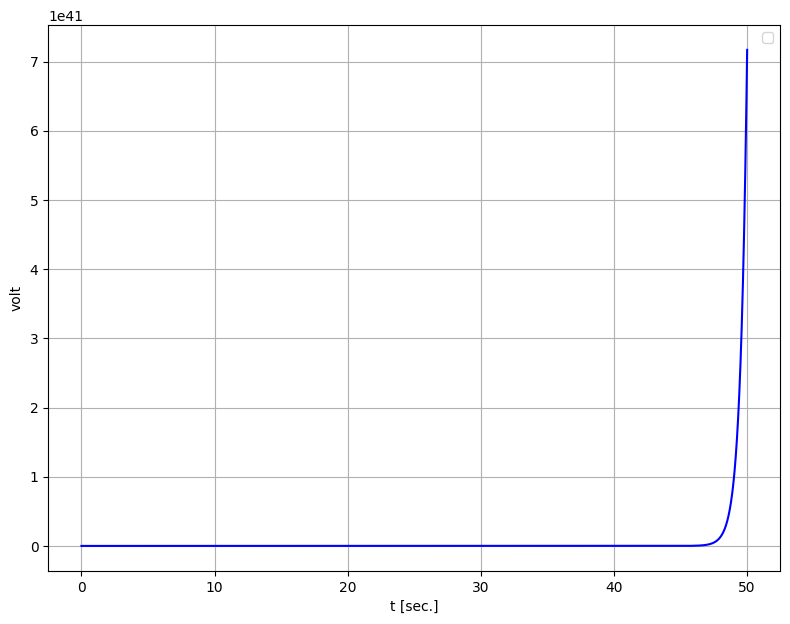

In [6]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 50
dt = 0.01
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(TF, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
#plt.subplot(2,1,1)
#plt.plot(t, u, "green")

#plt.grid()
#plt.legend(labels =("u"))
#plt.ylabel("volt")

#plt.subplot(2,1,2)
plt.legend(labels =("y"))
plt.plot(t, y, "blue")
plt.grid()
plt.xlabel("t [sec.]")
plt.ylabel("volt")

plt.savefig("sim_tf.pdf")